In [61]:
from glob import glob
import yaml
import os
from tqdm import tqdm
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
def read_benchmark(fp):
    with open(fp, 'r') as f:
        lines = f.readlines()
        return {k: float(v) if v != "NA" else np.nan
                for (k, v) in zip(lines[0].strip().split('\t'), lines[1].strip().split('\t')) 
                if k != 'h:m:s'}

In [49]:
with open("settings.yaml") as f:
    settings = yaml.safe_load(f)

benchmarks = []
for fp_benchmark in tqdm(glob(os.path.join(settings['dir_dist'], 'Benchmarks', '**', '*.benchmark'), recursive=True)):
    bench = read_benchmark(fp_benchmark)
    #bench.update({'type': os.path.basename(fp_benchmark)[:-1*len('.benchmark')]})
    bench.update({'type': os.path.dirname(fp_benchmark).split('/')[-1]})
    benchmarks.append(bench)
benchmarks = pd.DataFrame(benchmarks)

100%|██████████| 104/104 [00:00<00:00, 504.77it/s]


In [43]:
benchmarks['s'].sum(), benchmarks['max_rss'].max()

(57590.0316, 4409.94)

/homes/sjanssen/miniconda3/envs/notebookServer/lib/python3.10/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/homes/sjanssen/miniconda3/envs/notebookServer/lib/python3.10/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/homes/sjanssen/miniconda3/envs/notebookServer/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1384: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(


Text(0.5, 0, 'runtime in seconds\ntotalling in 959.8 minutes')

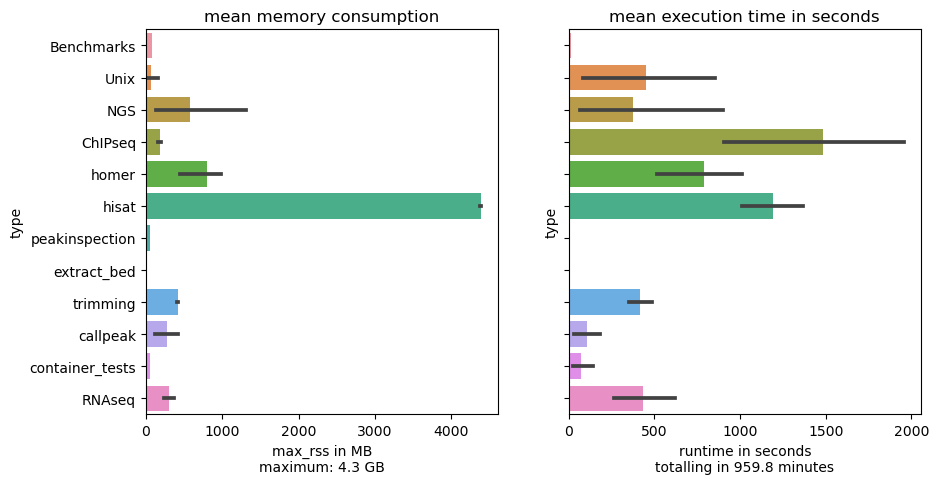

In [71]:
fig, axes = plt.subplots(1,2, figsize=(10,5), sharey=True)

ax = axes[0]
sns.barplot(data=benchmarks, x='max_rss', y='type', orient='h', ax=ax)
ax.set_title('mean memory consumption')
ax.set_xlabel('max_rss in MB\nmaximum: %.1f GB' % (benchmarks['max_rss'].max() / 1024))

ax = axes[1]
sns.barplot(data=benchmarks, x='s', y='type', orient='h', ax=ax)
ax.set_title('mean execution time in seconds')
ax.set_xlabel('runtime in seconds\ntotalling in %.1f minutes' % (benchmarks['s'].sum() / 60))

In [65]:
benchmarks

,s,max_rss,max_vms,max_uss,max_pss,io_in,io_out,mean_load,cpu_time,type
0,16.3540,83.67,4793.42,81.30,81.51,31.75,122.68,77.32,11.46,Benchmarks
1,415.6996,12.97,23.95,5.18,5.93,0.00,18.62,0.16,0.71,Unix
2,83.3989,162.96,326.66,156.81,157.14,91.81,785.53,86.89,73.64,Unix
3,855.0347,7.08,20.86,1.39,1.91,0.00,67.04,0.27,2.27,Unix
4,2364.4207,12.98,23.95,5.84,6.42,2717.46,3535.64,3.00,83.52,NGS
...,...,...,...,...,...,...,...,...,...,...
99,1506.1970,4403.71,4711.24,4378.41,4386.15,14402.37,14485.81,164.18,2498.07,hisat
100,1397.0088,4400.88,4711.23,4376.27,4382.83,13722.02,14242.75,163.02,2293.89,hisat
101,1826.6787,4409.94,4711.24,4388.95,4395.43,18394.70,19057.89,163.30,3020.42,hisat
102,1825.3106,4404.91,4711.23,4383.08,4389.58,18240.75,18953.56,164.61,3035.84,hisat
